In [56]:
import pandas as pd
import numpy as np

In [57]:
df = pd.read_csv('web_scraping_final.csv')

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge 
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

lm = LinearRegression()

#drop 'lifetime_gross' because that is the target (y value) value 
X, y = df.drop(['lifetime_gross', 'domestic total gross', 'rating','distributor','title','link_stub','key_0','genre'], axis=1), df['lifetime_gross']

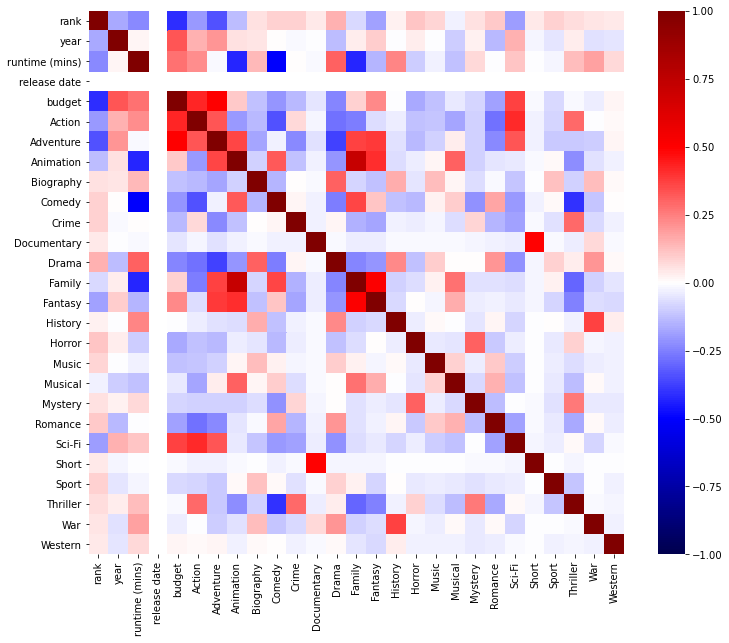

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.subplots(figsize=(12,10))
sns.heatmap(X.corr(), cmap="seismic", vmin=-1, vmax=1);
plt.savefig("movie_features_heatmap.png")

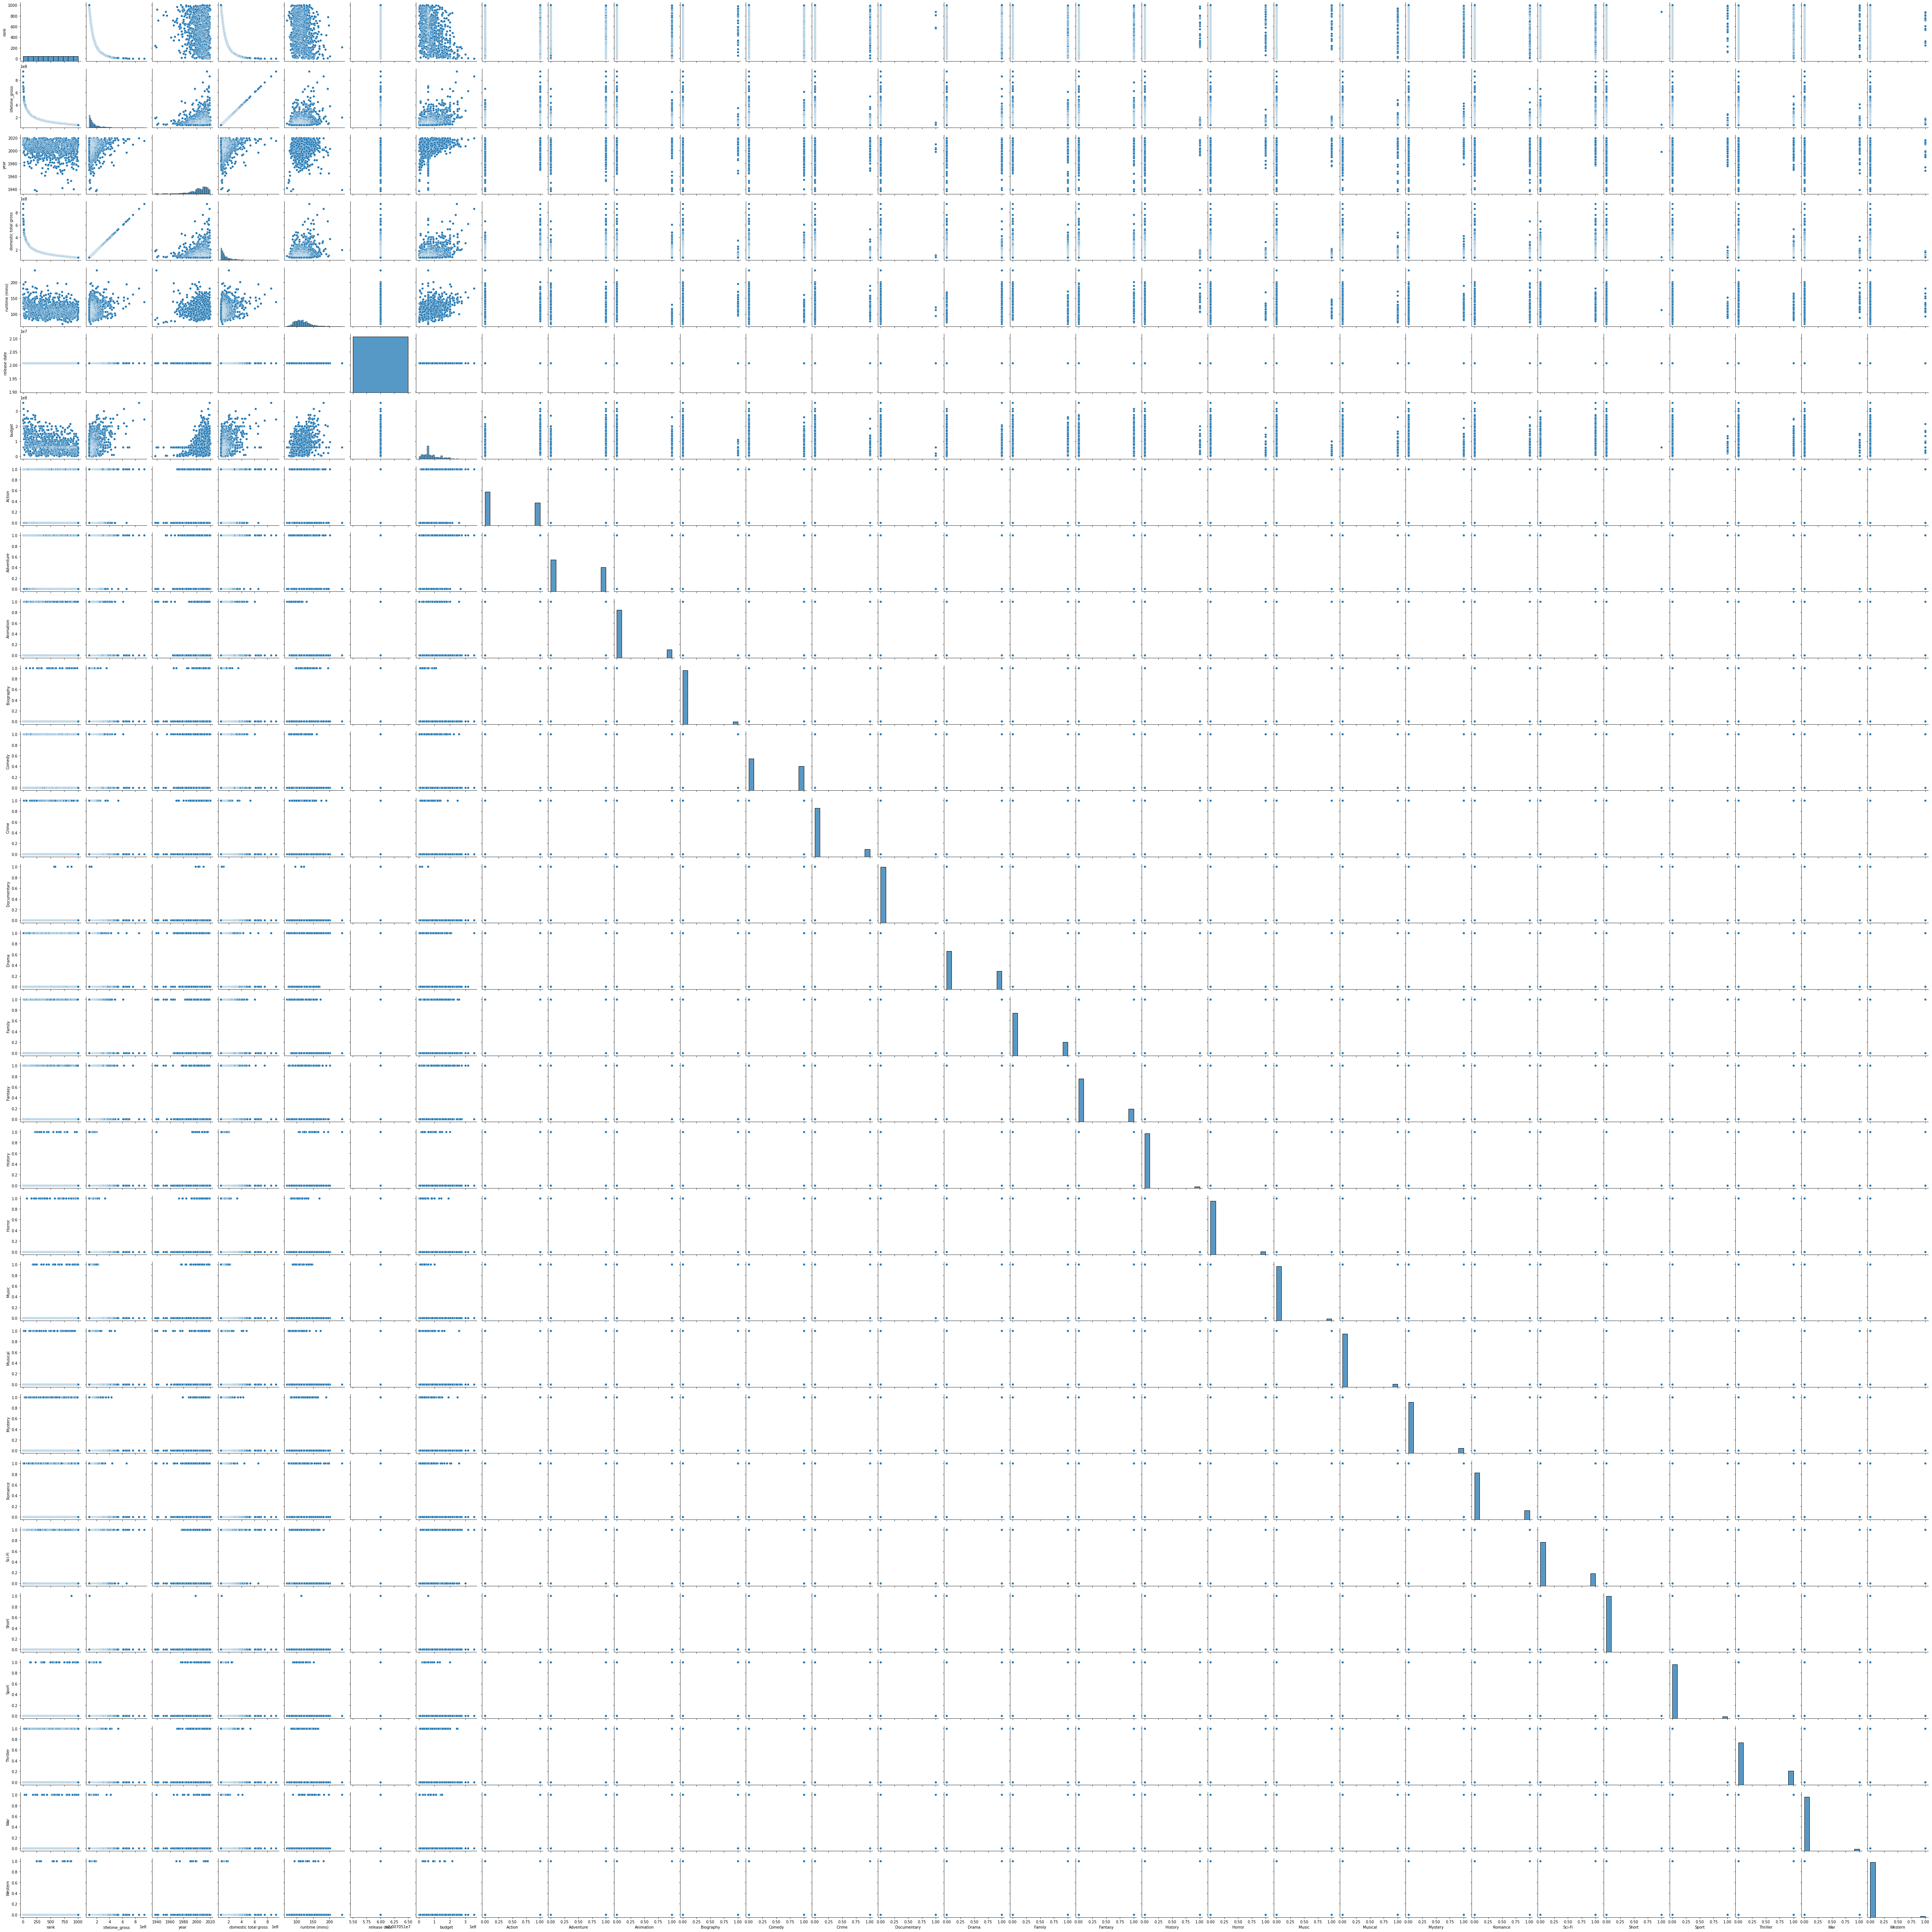

In [60]:
sns.pairplot(df);

In [43]:
import statsmodels.api as sm

movie_gross_model = sm.OLS(y, X, data=df)

results = movie_gross_model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         lifetime_gross   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     74.86
Date:                Wed, 14 Apr 2021   Prob (F-statistic):          2.95e-210
Time:                        15:33:20   Log-Likelihood:                -19045.
No. Observations:                 988   AIC:                         3.814e+04
Df Residuals:                     961   BIC:                         3.828e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
rank           -2.399e+05   7413.833    -32.355      0.000   -2.54e+05   -2.25e+05
year            1.346e+05   1.67e+05      0.806      0.421   -1.93e+05    4.63e+05
runtime (mins)  4.906e+05   1.24e+05      3.964      0.000    2.48e+05    7.34e+05
release date      -2.8137     16.660     -0.169      0.866     -35.507      29.880
budget             0.1335      0.046      2.882      0.004       0.043       0.224
Action         -5.285e+06   5.45e+06     -0.970      0.332    -1.6e+07    5.41e+06
Adventure       1.216e+07   5.41e+06      2.249      0.025    1.55e+06    2.28e+07
Animation       4.461e+06   8.09e+06      0.551      0.581   -1.14e+07    2.03e+07
Biography      -8.412e+06   1.01e+07     -0.837      0.403   -2.81e+07    1.13e+07
Comedy         -3.804e+06   5.47e+06     -0.696      0.487   -1.45e+07    6.92e+06
Crime           3.823e+06   6.08e+06      0.629      0.530   -8.11e+06    1.58e+07
Documentary    -2.401e+06   3.38e+07     -0.071      0.943   -6.88e+07     6.4e+07
Drama          -1.225e+06   5.27e+06     -0.233      0.816   -1.16e+07    9.11e+06
Family         -5.575e+06   7.15e+06     -0.779      0.436   -1.96e+07    8.46e+06
Fantasy        -1.369e+06   5.48e+06     -0.250      0.803   -1.21e+07    9.38e+06
History        -2.839e+07   1.33e+07     -2.132      0.033   -5.45e+07   -2.26e+06
Horror          1.087e+07   9.69e+06      1.122      0.262   -8.15e+06    2.99e+07
Music           5.717e+06   1.07e+07      0.534      0.594   -1.53e+07    2.67e+07
Musical        -7.782e+05   9.24e+06     -0.084      0.933   -1.89e+07    1.73e+07
Mystery        -3.038e+06   7.24e+06     -0.419      0.675   -1.73e+07    1.12e+07
Romance          7.45e+05   5.71e+06      0.131      0.896   -1.05e+07    1.19e+07
Sci-Fi          2.089e+07   5.38e+06      3.880      0.000    1.03e+07    3.15e+07
Short           2.378e+07   6.69e+07      0.356      0.722   -1.07e+08    1.55e+08
Sport          -1.642e+06   1.02e+07     -0.160      0.873   -2.17e+07    1.85e+07
Thriller       -1.627e+07   5.44e+06     -2.989      0.003    -2.7e+07   -5.59e+06
War             2.738e+06   1.14e+07      0.240      0.810   -1.97e+07    2.51e+07
Western        -2.211e+07   1.48e+07     -1.491      0.136   -5.12e+07    6.98e+06
==============================================================================
Omnibus:                      862.232   Durbin-Watson:                   0.276
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            31632.522
Skew:                           3.852   Prob(JB):                         0.00
Kurtosis:                      29.628   Cond. No.                     3.84e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition n

In [44]:
# hold out 20% of the data for final testing
X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=10)

In [45]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.2, random_state=3)

In [46]:
#60%
X_train.shape

(632, 27)

In [47]:
#20%
X_val.shape

(158, 27)

In [48]:
#20%
X_test.shape

(198, 27)

In [49]:
from sklearn.model_selection import (cross_val_score, train_test_split)

scores = cross_val_score(lm, X_train, y_train)
print(scores)
print("Linear Reg Mean Score: ", np.mean(scores))

# Build the Model
lm.fit(X_train, y_train)

[0.65116771 0.62038582 0.73341285 0.54772663 0.55240777]
Linear Reg Mean Score:  0.6210201582213448


LinearRegression()

In [51]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.values)
X_val_scaled = scaler.transform(X_val.values)
X_test_scaled = scaler.transform(X_test.values)

lm_reg = Ridge(alpha=1)

#Feature transforms in order to run our poly model on each
poly = PolynomialFeatures(degree=2) 

X_train_poly = poly.fit_transform(X_train.values)
X_val_poly = poly.transform(X_val.values)
X_test_poly = poly.transform(X_test.values)

lm_poly = LinearRegression()

In [52]:
#validate
#score on validation

lm.fit(X_train, y_train)
print(f'Linear Regression val R^2: {lm.score(X_val, y_val):.3f}')

lm_reg.fit(X_train_scaled, y_train)
print(f'Ridge Regression val R^2: {lm_reg.score(X_val_scaled, y_val):.3f}')

lm_poly.fit(X_train_poly, y_train)
print(f'Degree 2 polynomial regression val R^2: {lm_poly.score(X_val_poly, y_val):.3f}')

Linear Regression val R^2: 0.741
Ridge Regression val R^2: 0.742
Degree 2 polynomial regression val R^2: 0.826


In [54]:
lm_poly.fit(X,y)
print(f'Degree 2 polynomial regression test R^2: {lm_poly.score(X_test, y_test):.3f}')

Degree 2 polynomial regression test R^2: 0.630
